In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_3car_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..3-Carene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42967,0.175310,0.233013,0.002148,0.114778,0.056574,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74996,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74997,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74998,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..3-Carene'], axis = 1)
y = df_rf[['X..3-Carene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

<Axes: ylabel='Count'>

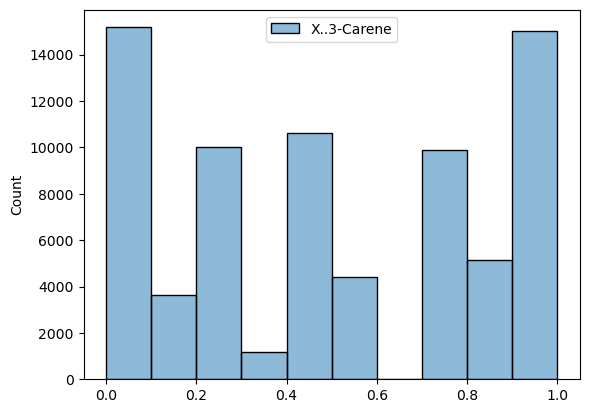

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1257/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.023064788539920233

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.004251778621753365

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.06520566403122788

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.99359433330923

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.9665467347651268

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.093900
1,lsa_1,0.092496
2,lsa_2,0.099453
3,lsa_3,0.085025
4,lsa_4,0.083574
...,...,...
81,tree,0.000659
82,tropical,0.002369
83,vanilla,0.053021
84,violet,0.000106


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
45,cheese,1.099328e-01
2,lsa_2,9.945311e-02
0,lsa_0,9.390013e-02
1,lsa_1,9.249611e-02
3,lsa_3,8.502453e-02
4,lsa_4,8.357390e-02
6,indica,7.384065e-02
83,vanilla,5.302141e-02
58,lemon,3.146162e-02
5,hybrid,2.454239e-02


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([9.55092147e-02, 9.42485992e-02, 9.54496778e-02, 8.70547870e-02,
       8.21949213e-02, 2.39140226e-02, 7.37182565e-02, 1.92961121e-02,
       4.33918029e-04, 2.50082574e-03, 3.04118434e-03, 0.00000000e+00,
       5.67552155e-03, 1.17218588e-04, 9.87794551e-03, 7.59231528e-03,
       5.68059565e-03, 6.83137484e-03, 0.00000000e+00, 5.94405854e-03,
       0.00000000e+00, 0.00000000e+00, 9.62858884e-03, 9.74380765e-03,
       1.10919438e-02, 1.06315706e-03, 4.30178706e-03, 2.61207003e-04,
       0.00000000e+00, 3.46432779e-03, 1.02359621e-02, 0.00000000e+00,
       4.97210398e-03, 3.83127760e-07, 0.00000000e+00, 7.16226202e-03,
       3.78879009e-03, 7.11907245e-03, 1.41991658e-04, 1.08507133e-04,
       1.43425871e-04, 4.30376533e-03, 8.91199219e-05, 6.40080820e-03,
       7.51126980e-05, 1.09819239e-01, 1.16992161e-03, 1.55370187e-03,
       5.04068428e-03, 2.27260022e-04, 1.86792446e-02, 8.96257097e-03,
       5.40467553e-03, 3.95353000e-04, 3.22173137e-03, 4.51665022e-04,
      

In [23]:
selector.threshold_

0.011627906976744186

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,cheese,diesel,lemon,orange,vanilla
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0,0
2,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0,0
3,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0,0
4,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.175310,0.233013,0.002148,0.114778,0.056574,0,1,0,0,0,0,0,0
74996,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,0,0,0,0
74997,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,0,0,0,0
74998,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_3car.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_3car.pkl")

['selected_X_rf_lsa_elbow_3car.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1257/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.02435909414295703

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.00466593807875293

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.0683076721807509

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9847949026884524

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.9631392493886177

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_valida

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_3car.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_3car.pkl")

['rscv_rf_lsa_elbow_best_params_3car.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 500, min_samples_split = 5, max_features = 'sqrt', min_samples_leaf = 1, max_depth = 100)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1257/581837506.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.028074976741572368

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.004677177243206486

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.06838989138174212

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9832599979121671

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.9630504603753453

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_3car.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_3car.pkl")

['y_test_rfreg_lsa_elbow_3car.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.029639740077400136

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.005113290030879239

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.07150727257334906

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.9604722014196074

Error analysis

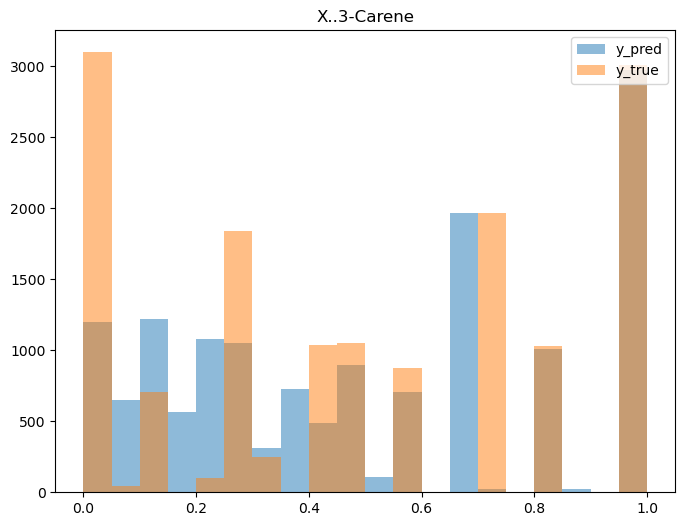

<Figure size 640x480 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..3-Carene"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_3car.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.982
P-value: 0.000


<Axes: >

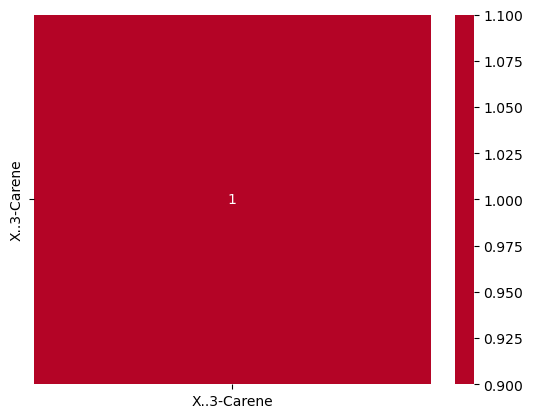

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)